In [54]:
import os              #for input output operation
import pandas as pd    #dataframe operation
import numpy as np     #numeric operation
from fancyimpute import KNN   #fancy impute for knn imputation 

In [55]:
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
os.chdir("C:/users/user")

In [56]:
Train_data= pd.read_csv("Train_data.csv")
Test_data=pd.read_csv("Test_data.csv")

In [7]:
#outliers analysis
df=Train_data.copy()
#Train_data=df.copy()

In [4]:
Train_data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'number customer service calls', 'Churn'],
      dtype='object')

In [57]:
#KNN Imputation method
#convert level or categorical to numeric
for i in range(0, Train_data.shape[1]):
    #print(i)
    if (Train_data.iloc[:,i].dtype=='object'):
        Train_data.iloc[:,i]=pd.Categorical(Train_data.iloc[:,i])
        #print(marketing_train[i])
        Train_data.iloc[:,i]=Train_data.iloc[:,i].cat.codes

In [6]:
#replace -1 with NA to impute
for i in range(0, Train_data.shape[1]):
    Train_data.iloc[:,i]=Train_data.iloc[:,i].replace(-1,np.nan)

In [9]:
#impute KNN imputation
Train_data=pd.DataFrame(KNN(k=3).complete(Train_data), 
                        columns=Train_data.columns)

ValueError: Input matrix is not missing any values

{'boxes': [<matplotlib.lines.Line2D at 0xebde208>],
 'caps': [<matplotlib.lines.Line2D at 0xebdec18>,
 'fliers': [<matplotlib.lines.Line2D at 0xebf18d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xebf14a8>],
 'whiskers': [<matplotlib.lines.Line2D at 0xebde358>,
  <matplotlib.lines.Line2D at 0xebde7f0>]}

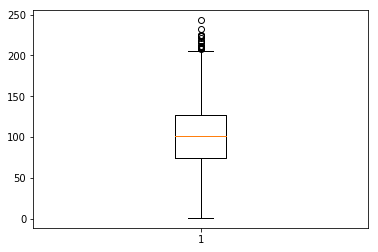

In [7]:
#boxplot to visualize the outliers
%matplotlib inline
plt.boxplot(Train_data['account length'])

In [8]:
#save continuous variable
cnames=['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'number customer service calls']

In [12]:
#detect &delete outliers
for i in cnames:
    print(i)
    q75,q25=np.percentile(Train_data.loc[:,i],[75,25])
    iqr= q75-q25
    
    min= q25-(iqr*1.5)
    max= q75+(iqr*1.5)
    print(min)
    print(max)
    
    Train_data=Train_data.drop(Train_data[Train_data.loc[:,i]< min].index)
    Train_data=Train_data.drop(Train_data[Train_data.loc[:,i]> max].index)

account length
-5.5
206.5
area code
255.0
663.0
number vmail messages
-30.0
50.0
total day minutes
34.83749999999992
325.1375000000001
total day calls
46.5
154.5
total day charge
6.125
55.125
total eve minutes
64.42499999999995
337.82500000000005
total eve calls
46.5
154.5
total eve charge
5.5550000000000015
28.634999999999998
total night minutes
64.3
337.90000000000003
total night calls
48.0
152.0
total night charge
2.9449999999999985
15.145000000000001
total intl minutes
3.1000000000000005
17.5
total intl calls
-1.5
10.5
total intl charge
0.8949999999999996
4.695
number customer service calls
-0.5
3.5


In [9]:
#feature selection or feature engineering
# correlation analysis
#corraltion plot
df_corr=Train_data.loc[:, cnames]

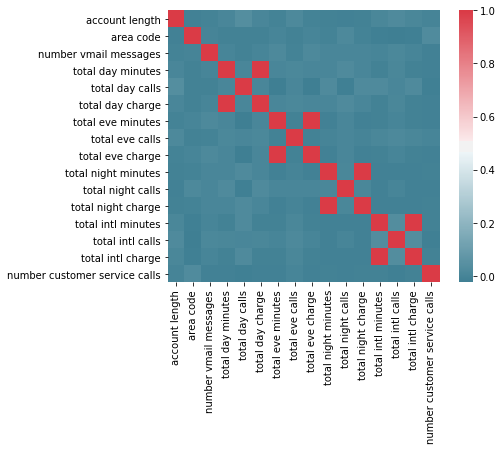

In [10]:
#set the width & heigth of the plot
f, ax= plt.subplots(figsize=(7,5))

#generate or develop a correlation plot
corr= df_corr.corr()

#plot use seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            square=True, ax=ax)

In [21]:
Train_data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'number customer service calls', 'Churn'],
      dtype='object')

In [11]:
#chi square test of independence
#save categorical variables
cat_names=['state', 'phone number', 'international plan', 
           'voice mail plan', 'Churn']

In [12]:
#loop for chi square values
for i in cat_names:
    print(i)
    chi2, p, dof, ex= chi2_contingency(pd.crosstab(Train_data['Churn'], 
                                                   Train_data[i]))
    print(p)

state
0.002296221552011188
phone number
0.49185608455943547
international plan
2.4931077033159556e-50
voice mail plan
5.15063965903898e-09
Churn
0.0


In [58]:
Train_data=Train_data.drop(['phone number', 'total day minutes', 'total eve minutes', 
                            'total intl minutes', 'total night minutes'], axis=1)


In [14]:
Train_data.shape

(3333, 16)

In [16]:
Train_data.shape

(2797, 21)

(array([  5.,   3.,   3.,   6.,   7.,  19.,  29.,  28.,  38.,  60.,  74.,
        100., 114., 146., 164., 215., 236., 210., 225., 199., 251., 198.,
        203., 181., 134., 126.,  83.,  73.,  71.,  43.,  31.,  21.,  12.,
         11.,   7.,   4.,   3.]),
 array([ 0.        ,  1.61189189,  3.22378378,  4.83567568,  6.44756757,
         8.05945946,  9.67135135, 11.28324324, 12.89513514, 14.50702703,
        16.11891892, 17.73081081, 19.3427027 , 20.95459459, 22.56648649,
        24.17837838, 25.79027027, 27.40216216, 29.01405405, 30.62594595,
        32.23783784, 33.84972973, 35.46162162, 37.07351351, 38.68540541,
        40.2972973 , 41.90918919, 43.52108108, 45.13297297, 46.74486486,
        48.35675676, 49.96864865, 51.58054054, 53.19243243, 54.80432432,
        56.41621622, 58.02810811, 59.64      ]),
 <a list of 37 Patch objects>)

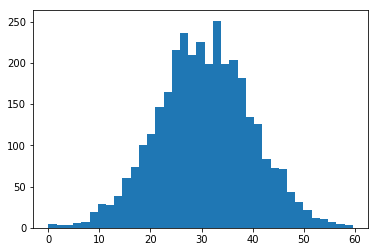

In [15]:
#feature scaling
%matplotlib inline
plt.hist(Train_data['total day charge'], bins='auto')

In [16]:
cnames=['account length', 'area code', 'number vmail messages','total day calls', 
        'total day charge', 'total eve calls', 'total eve charge', 
        'total night calls', 'total night charge', 'total intl calls', 
        'total intl charge','number customer service calls']

In [59]:
cnames1=['account length', 'area code', 'number vmail messages','total day calls', 
         'total day charge', 'total eve calls', 'total eve charge', 
         'total night calls', 'total night charge', 'total intl calls', 
         'total intl charge','number customer service calls']

In [33]:
Train_data.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day calls',
       'total day charge', 'total eve calls', 'total eve charge',
       'total night calls', 'total night charge', 'total intl calls',
       'total intl charge', 'number customer service calls', 'Churn'],
      dtype='object')

In [8]:
from math import radians
import numpy as np

In [9]:
Train_data.head(5)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,no,yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False.
1,OH,107,415,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False.
2,NJ,137,415,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False.
3,OH,84,408,yes,no,0,71,50.90,88,5.26,89,8.86,7,1.78,2,False.
4,OK,75,415,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3,False.


In [60]:
#normalization
for i in cnames1:
    print(i)
    Train_data[i]=(Train_data[i]-min(Train_data[i]))/
    (max(Train_data[i])-min(Train_data[i]))

account length
area code
number vmail messages
total day calls
total day charge
total eve calls
total eve charge
total night calls
total night charge
total intl calls
total intl charge
number customer service calls


In [21]:
#normalization
for i in cnames1:
    print(i)
    Test_data[i]=(Test_data[i]-min(Test_data[i]))/
    (max(Test_data[i])-min(Test_data[i]))

account length
area code
number vmail messages
total day calls
total day charge
total eve calls
total eve charge
total night calls
total night charge
total intl calls
total intl charge
number customer service calls


In [61]:
#KNN Imputation method
#convert level or categorical to numeric
for i in range(0, Test_data.shape[1]):
    #print(i)
    if (Test_data.iloc[:,i].dtype=='object'):
        Test_data.iloc[:,i]=pd.Categorical(Test_data.iloc[:,i])
        #print(marketing_train[i])
        Test_data.iloc[:,i]=Test_data.iloc[:,i].cat.codes

In [20]:
#replace -1 with NA to impute
for i in range(0, Test_data.shape[1]):
    Test_data.iloc[:,i]=Test_data.iloc[:,i].replace(-1,np.nan)

In [26]:
#impute KNN imputation
Test_data=pd.DataFrame(KNN(k=3).complete(Test_data), 
                       columns=Test_data.columns)

ValueError: Input matrix is not missing any values

{'boxes': [<matplotlib.lines.Line2D at 0xeff29e8>],
 'caps': [<matplotlib.lines.Line2D at 0xf008438>,
 'fliers': [<matplotlib.lines.Line2D at 0xf0120f0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xf008c88>],
 'whiskers': [<matplotlib.lines.Line2D at 0xeff2b38>,
  <matplotlib.lines.Line2D at 0xeff2fd0>]}

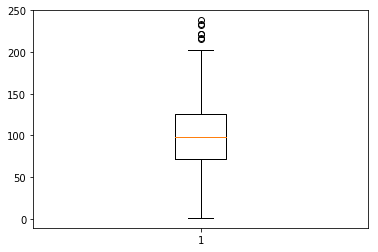

In [21]:
#boxplot to visualize the outliers
%matplotlib inline
plt.boxplot(Test_data['account length'])

In [24]:
#save continuous variable
cnames=['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'number customer service calls']

In [22]:
#feature selection or feature engineering
# correlation analysis
#corraltion plot
df_corr=Test_data.loc[:, cnames]

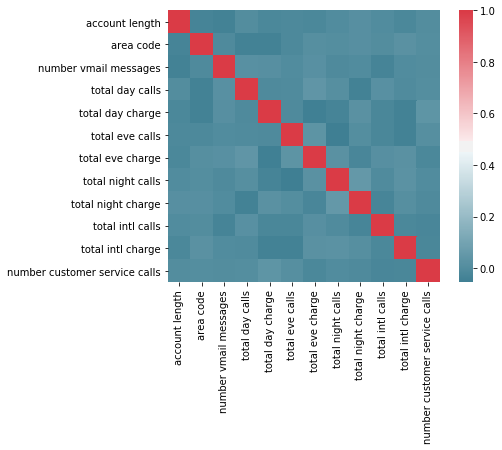

In [23]:
#set the width & heigth of the plot
f, ax= plt.subplots(figsize=(7,5))

#generate or develop a correlation plot
corr= df_corr.corr()

#plot use seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            square=True, ax=ax)

In [24]:
#chi square test of independence
#save categorical variables
cat_names=['state', 'phone number', 'international plan', 
           'voice mail plan', 'Churn']

In [25]:
#loop for chi square values
for i in cat_names:
    print(i)
    chi2, p, dof, ex= chi2_contingency(pd.crosstab(Test_data['Churn'], Test_data[i]))
    print(p)

state
0.04704128056421094
phone number
0.4884843036516998
international plan
3.196020957225603e-25
voice mail plan
1.3418939000071555e-07
Churn
0.0


In [62]:
Test_data=Test_data.drop(['phone number', 'total day minutes', 
                          'total eve minutes', 'total intl minutes', 
                          'total night minutes'], axis=1)

(array([  2.,   0.,   4.,   7.,   8.,  18.,  35.,  35.,  53.,  74., 106.,
        122., 126., 141., 156., 152., 129., 122., 108.,  75.,  58.,  42.,
         38.,  24.,  14.,   9.,   6.,   2.,   1.]),
 array([ 1.12      ,  3.14206897,  5.16413793,  7.1862069 ,  9.20827586,
        11.23034483, 13.25241379, 15.27448276, 17.29655172, 19.31862069,
        21.34068966, 23.36275862, 25.38482759, 27.40689655, 29.42896552,
        31.45103448, 33.47310345, 35.49517241, 37.51724138, 39.53931034,
        41.56137931, 43.58344828, 45.60551724, 47.62758621, 49.64965517,
        51.67172414, 53.6937931 , 55.71586207, 57.73793103, 59.76      ]),
 <a list of 29 Patch objects>)

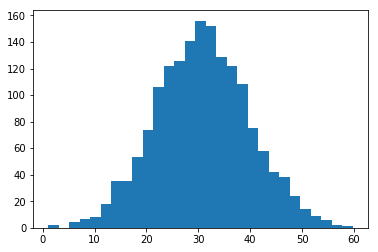

In [27]:
#feature scaling
%matplotlib inline
plt.hist(Test_data['total day charge'], bins='auto')

In [ ]:
cnames=['account length', 'area code', 'number vmail messages','total day calls', 
        'total day charge', 'total eve calls', 'total eve charge', 'total night calls', 
        'total night charge', 'total intl calls', 'total intl charge',
        'number customer service calls']

In [63]:
cnames2=['account length', 'area code', 'number vmail messages',
         'total day calls', 'total day charge', 'total eve calls', 
         'total eve charge', 'total night calls', 'total night charge', 
         'total intl calls', 'total intl charge','number customer service calls']

In [37]:
Test_data.head(5)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,number customer service calls,Churn
0,11,101,510,0,0,0,123,12.05,73,18.01,73,10.62,3,2.86,3,0
1,26,137,510,0,0,0,86,38.01,139,20.81,81,4.24,7,2.57,0,0
2,35,103,408,0,1,29,95,50.10,105,20.17,127,13.51,6,3.70,1,0
3,32,99,415,0,0,0,123,36.86,88,10.74,82,9.93,2,4.24,1,0
4,40,108,415,0,0,0,78,33.56,101,10.54,107,9.20,4,2.08,2,0


In [64]:
#normalization
for i in cnames2:
    print(i)
    Test_data[i]=(Test_data[i]-min(Test_data[i]))/(max(Test_data[i])-min(Test_data[i]))

account length
area code
number vmail messages
total day calls
total day charge
total eve calls
total eve charge
total night calls
total night charge
total intl calls
total intl charge
number customer service calls


In [65]:
#replace target categories with yes or no
Train_data['Churn']=Train_data['Churn'].replace(1,'True')
Test_data['Churn']=Test_data['Churn'].replace(1,'True')

In [66]:
#replace target categories with yes or no
Train_data['Churn']=Train_data['Churn'].replace(0,'False')
Test_data['Churn']=Test_data['Churn'].replace(1,'True')

In [67]:
#stratified sampling
from sklearn.cross_validation import train_test_split


In [68]:
#model development
#import libraries for decision trees
from sklearn import tree
from sklearn.metrics import accuracy_score

In [69]:
Train_data.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,number customer service calls,Churn
0,16,0.524793,0.068627,0,1,0.490196,0.666667,0.755701,0.582353,0.542866,0.408451,0.595935,0.15,0.500000,0.111111,False
1,35,0.438017,0.068627,0,1,0.509804,0.745455,0.460597,0.605882,0.537690,0.492958,0.622236,0.15,0.685185,0.111111,False
2,31,0.561983,0.068627,0,0,0.000000,0.690909,0.693830,0.647059,0.333225,0.500000,0.375374,0.25,0.609259,0.000000,False
3,35,0.342975,0.000000,1,0,0.000000,0.430303,0.853454,0.517647,0.170171,0.394366,0.467424,0.35,0.329630,0.222222,False
4,36,0.305785,0.068627,1,0,0.000000,0.684848,0.475184,0.717647,0.407959,0.619718,0.440526,0.15,0.505556,0.333333,False


In [70]:

X= Train_data.values[:, 0:15]
Y= Train_data.values[:, 15]

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2)

In [72]:
#model development
#import libraries for decision trees
from sklearn import tree
from sklearn.metrics import accuracy_score

In [46]:
from ggplot import *

C:\New folder\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\New folder\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\New folder\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [49]:
ggplot(Train_data, aes(x='total day calls', y= 'total eve calls', 
                       color= 'Churn', shape='internationa plan'), 
                       geom_point(alpha=1, size=50))

TypeError: __init__() takes 3 positional arguments but 4 were given

In [53]:
Train_data.head()

,Churn,account length,area code,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,...,state_45,state_46,state_47,state_48,state_49,state_50,international plan_0,international plan_1,voice mail plan_0,voice mail plan_1
0,False,0.524793,0.068627,0.490196,0.666667,0.755701,0.582353,0.542866,0.408451,0.595935,...,0,0,0,0,0,0,1,0,0,1
2,False,0.561983,0.068627,0.000000,0.690909,0.693830,0.647059,0.333225,0.500000,0.375374,...,0,0,0,0,0,0,1,0,1,0
3,False,0.342975,0.000000,0.000000,0.430303,0.853454,0.517647,0.170171,0.394366,0.467424,...,0,0,0,0,0,0,0,1,1,0
5,False,0.483471,1.000000,0.000000,0.593939,0.636821,0.594118,0.606600,0.598592,0.486551,...,0,0,0,0,0,0,0,1,1,0
6,False,0.495868,1.000000,0.470588,0.533333,0.621898,0.635294,0.958266,0.598592,0.509863,...,0,0,0,0,0,0,1,0,0,1


In [73]:
#decision tree classifier on the top of train data
clf= tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, Y_train)

In [74]:
#predict new test cases
Y_pred= clf.predict(X_test)

In [76]:
#create dot file to visualize tree  #https://webgraphviz.com/
dotfile= open("pt1.dot", 'w')
df= tree.export_graphviz(clf, out_file=dotfile)

In [77]:
#check accuracy of the model
accuracy_score(Y_test, Y_pred)*100

92.80359820089956

In [78]:
#built confusion matrix
from sklearn.metrics import confusion_matrix
CM=confusion_matrix(Y_test, Y_pred)

In [79]:
CM=pd.crosstab(Y_test, Y_pred)

In [80]:
#let us save TP,TN, TP, FN
TN=CM.iloc[0,0]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]
FP=CM.iloc[0,1]


In [81]:
#check accuracy of the model
accuracy_score(Y_test, Y_pred)*100

92.80359820089956

In [82]:
#accuracy
((TN+TP)*100)/(TN+TP+FN+FP)

92.80359820089954

In [83]:
#false positive rate
(FN*100)/(FN+TP)

27.083333333333332

In [84]:
#recall
(TP*100)/(TP+FN)

72.91666666666667

In [85]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=500).fit(X_train, Y_train)

In [86]:
RF_prediction=RF_model.predict(X_test)

In [87]:
#build confusion matrix
#from sklearn.metrics import consuaion_matrix
#CM= confusion_matrix(Y_test,Y_pred)

CM=pd.crosstab(Y_test, RF_prediction)

In [88]:
#let us save TP,TN, TP, FN
TN=CM.iloc[0,0]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]
FP=CM.iloc[0,1]

In [89]:
#check accuracy of the model
#accuracy_score(Y_test, Y_pred)*100
#accuracy
((TN+TP)*100)/(TN+TP+FN+FP)

94.60269865067467

In [90]:
#extract false negative rate
(FN*100)/(FN+TP)

33.333333333333336

In [92]:
#logistic regression
#let us prepare data for logistics regression
#replace target categories with yes with 1 or no with 0
Train_data['Churn']=Train_data['Churn'].replace('no', 0)
Train_data['Churn']=Train_data['Churn'].replace('yes', 1)

In [93]:
#create logistic dataset, save target variable first
Train_data_logit=pd.DataFrame(Train_data['Churn'])

In [94]:
#continuous variable
cnames3=['account length', 'area code', 'number vmail messages',
         'total day calls', 'total day charge', 'total eve calls', 
         'total eve charge', 'total night calls', 'total night charge', 
         'total intl calls', 'total intl charge','number customer service calls']

In [95]:
#add continuous variable on these excisting dataset
Train_data_logit=Train_data_logit.join(Train_data[cnames3])

In [33]:
Train_data.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day calls',
       'total day charge', 'total eve calls', 'total eve charge',
       'total night calls', 'total night charge', 'total intl calls',
       'total intl charge', 'number customer service calls', 'Churn'],
      dtype='object')

In [96]:
#create dummies for categorical variable
cat_names=["state", "international plan", "voice mail plan"]
for i in cat_names:
    temp=pd.get_dummies(Train_data[i], prefix = i)
    Train_data_logit=Train_data_logit.join(temp)

In [101]:
Train_data_logit.shape

(3333, 68)

In [98]:
#divide the data into train & test data
sample_index=np.random.rand(len(Train_data_logit)) < 0.8

Train_data=Train_data_logit[sample_index]
Test_data= Train_data_logit[~sample_index]

In [103]:
#select columns index for independent variable
train_cols=train.columns[1:68]

In [37]:
#from statsmodels.api import logit
class statsmodels.iolib.summary.Summary

SyntaxError: invalid syntax (<ipython-input-37-512020b4e8fc>, line 2)

In [114]:
#build logistic regression model
import statsmodels.api as sm

logit=sm.Logit(Train_data['Churn'], Train_data[train_cols]).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
#predict test data
test['actual_prob']= logit.predict(test[train_cols])

In [ ]:
#feed the test value with 0 or 1
test['actualval']=1
test.loc[test.actual_prob < 0.5, 'actualval']=0

In [ ]:
#built confusion matrix
CM= pd.crosstab(test['responded'], test['actualval'])

#let us same TP, TN, FP, FN
TN=CM.iloc[0,0]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]
FP=CM.iloc[0,1]

#CHECK ACCURACY
#accuracy_score(Y_test, Y_pred)*100
#accuracy
((TN+TP)*100)/(TN+TP+FN+FP)

#FNR
#(FN*100)/(FN+TP)

In [ ]:
#FNR
(FN*100)/(FN+TP)

In [106]:
#KNN python k nearest neighbour
#KNN Implementation
from sklearn.neighbors import KNeighborsClassifier

KNN_model= KNeighborsClassifier(n_neighbors=7).fit(X_train, Y_train)

In [107]:
#predict test cases
KNN_predictions=KNN_model.predict(X_test)

In [108]:
#build confusion matrix
CM=pd.crosstab(Y_test, KNN_predictions)

#let us same TP, TN, FP, FN
TN=CM.iloc[0,0]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]
FP=CM.iloc[0,1]

#check accuracy of model
#accuracy_score(Y_test, Y_pred)*100
((TN+TP)*100)/(TN+TP+FN+FP)

#FNR
#(FN*100)/(FN+TP)

86.05697151424287

In [109]:
#FNR
(FN*100)/(FN+TP)

94.79166666666667

In [110]:
#naive bayers
from sklearn.naive_bayes import GaussianNB

NB_model= GaussianNB().fit(X_train, Y_train)

In [111]:
NB_prediction= NB_model.predict(X_test)

In [112]:
#build confusion matrix
CM=pd.crosstab(Y_test, NB_prediction)

#let us same TP, TN, FP, FN
TN=CM.iloc[0,0]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]
FP=CM.iloc[0,1]

#check accuracy of model
#accuracy_score(Y_test, Y_pred)*100
((TN+TP)*100)/(TN+TP+FN+FP)

#FNR
#(FN*100)/(FN+TP)

86.05697151424287

In [113]:
#FNR
(FN*100)/(FN+TP)

63.541666666666664

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

KNN_Reg=KNeighborsRegressor(n_neighbors = 5).fit(X_train, Y_train)



In [ ]:
print(KNN_Reg.predict(X_test))
print('R_squared test score: {:,3f}'
     .format(KNN_Reg.score(X_test, Y_test)))